In [1]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [10]:
df_train_x <- read.csv("../data/df_train_x.csv") %>% select(-X) 
df_test_x <- read.csv("../data/df_test_x.csv") %>% select(-X) 
vec_train_y <- read.csv("../data/vec_train_y.csv") %>% select(-X, x) %>% data.matrix()
vec_test_y <- read.csv("../data/vec_test_y.csv") %>% select(-X)  %>% data.matrix()
df_train <- cbind(df_train_x, churn=vec_train_y) %>% select(churn = x, everything())
df_test <- cbind(df_test_x, churn=vec_test_y) %>% select(churn = x, everything())

In [11]:
base_model <- glm(churn ~ .,data = df_train, family = "binomial")

In [12]:
#install.packages("InformationValue")
library(InformationValue)
library(yardstick)


Loading required package: broom

Attaching package: 'yardstick'

The following objects are masked from 'package:InformationValue':

    npv, precision



In [30]:
vec_pred_y <-  predict(base_model, newdata = df_test_x, type = "response")
opt_cut <- optimalCutoff(vec_test_y, vec_pred_y)
vec_est_y <- ifelse(vec_pred_y <= opt_cut, 0, 1)


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

In [23]:
library(forcats)
options(yardstick.event_first = FALSE)
tbl_estimates <- tibble(
    truth      = as.factor(vec_test_y) %>% fct_recode(yes = "1", no = "0"),
    estimate   = as.factor(vec_est_y) %>% fct_recode(yes = "1", no = "0"),
    class_prob = vec_pred_y
)

head(tbl_estimates)

truth,estimate,class_prob
no,no,0.051672459
no,no,0.180447163
no,no,0.049039736
no,no,0.007867599
no,yes,0.861489214
no,no,0.011577785


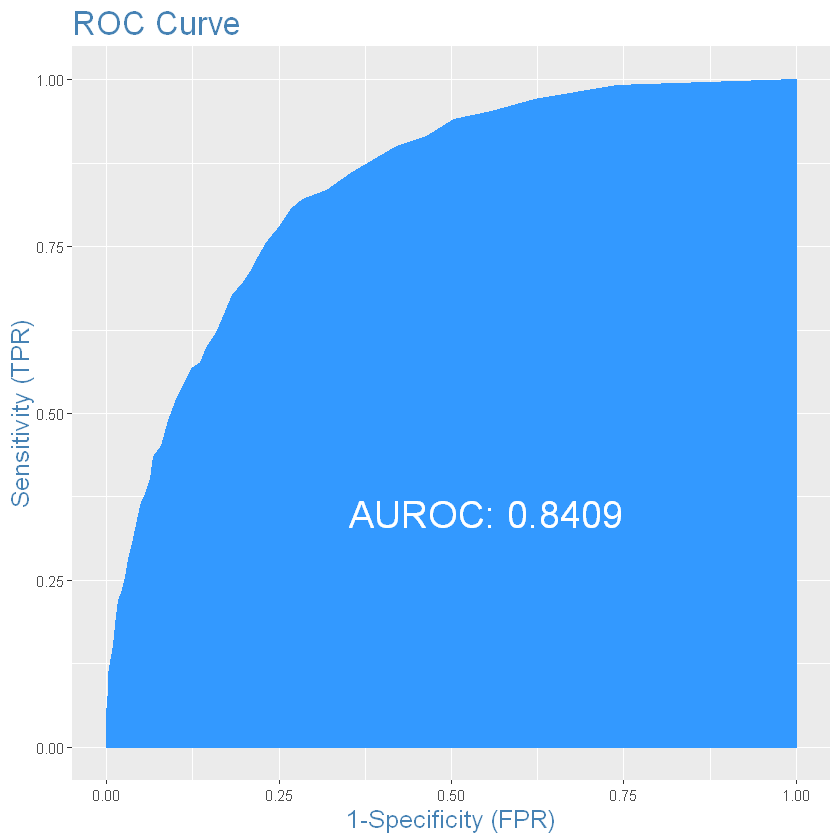

In [24]:
plotROC(actuals = vec_test_y, predictedScores = vec_pred_y)

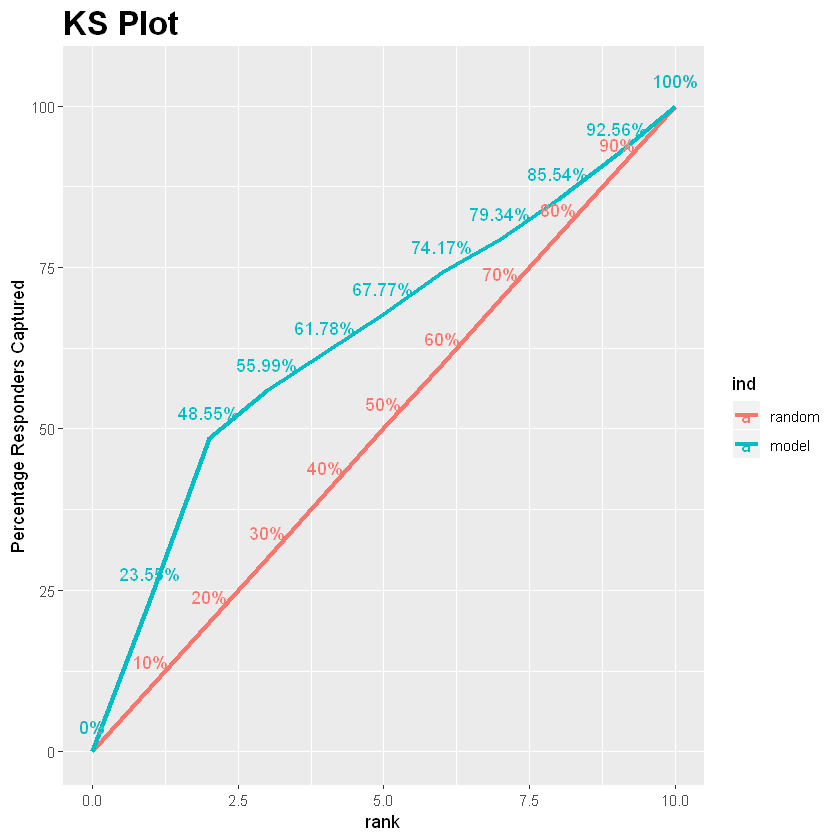

In [25]:
ks_plot(actuals = as.numeric(vec_test_y), predictedScores = vec_est_y)

In [26]:
optimalCutoff(vec_test_y, vec_pred_y)

[1] 0.4845688

In [27]:
tbl_estimates %>% conf_mat(truth, estimate)

          Truth
Prediction   no  yes
       no  1150  233
       yes  124  251

In [45]:
# Accuracy
tbl_estimates %>% metrics(truth, estimate)

accuracy
0.7969283


In [44]:
# Precision
tibble(
    precision = tbl_estimates %>% precision(truth, estimate),
    recall    = tbl_estimates %>% recall(truth, estimate)
)

precision,recall
0.6693333,0.518595
